In [1]:
import TreeSOM

## Load image files
Choose your working directory, all the files will be saved under base directory. 
Store images under `/base_directory/images`. 

`CleanupBaseDirectory` initialises existing files. 

In [2]:
base_directory = '/project/rpp-chime/hgan/notebooks/TreeSOM/'
disccofanSOM_directory = '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM/'

TreeSOM.CleanupBaseDirectory(
    base_directory,
    disccofanSOM_directory,
)

rm: cannot remove '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/': No such file or directory
rm: cannot remove '/project/rpp-chime/hgan/notebooks/TreeSOM//SOMs/': No such file or directory
rm: cannot remove '/project/rpp-chime/hgan/notebooks/TreeSOM//filtered/': No such file or directory
rm: cannot remove '/project/rpp-chime/hgan/notebooks/TreeSOM//excess_tables/': No such file or directory
rm: cannot remove '/project/rpp-chime/hgan/notebooks/TreeSOM//sum_tables/': No such file or directory


In [4]:
imagefiles = TreeSOM.LoadImageDirectory(img_directory = base_directory + '/images', extension='jpg')

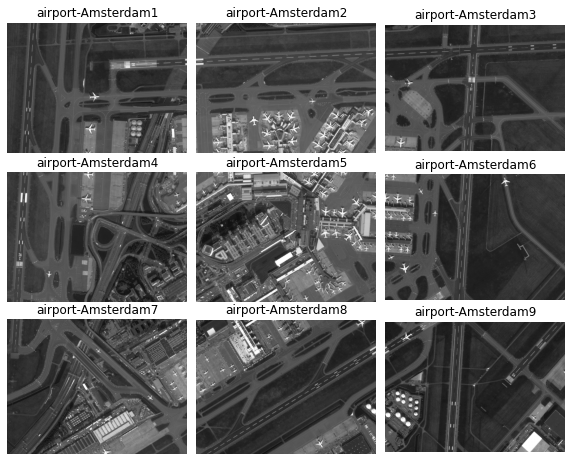

In [5]:
TreeSOM.ShowImages(imagefiles)

## Create Max trees 
Make sure that you have installed [`disccofan`](https://github.com/sgazagnes/disccofan) and have it running. 

### Parameters (for details see https://github.com/sgazagnes/disccofan) 

#### Type of connectivity:

4:  4 connectivity for 2D dataset (default for 2D) \
6:  6 connectivity for 3D dataset (default for 3D) \
8:  8 connectivity for 2D dataset \
26: 26 connectivity for 3D dataset 

#### Attributes : Choose the attribute used in the tree nodes

0: Area (default) \
1: Area of min enclosing rectangle \
2: Square of diagonal of minimal enclosing rectangle \
3: Moment of inertia \
4: (Moment of Inertia) / (area)^2 \
5: Mean X position \
6: Mean Y position \
7: Mean Z position \
8 - Full inertia: area (same as attribute 0) \
9 - Full inertia: elongation \
10 - Full inertia: flatness \
11 - Full inertia: sparseness \
12 - Full inertia: Ncompactness

lval (lambda value) : Threshold value for pruning

In [5]:
TreeSOM.CreateTrees_in_Parallel(imagefiles,
    extension='jpg',
    disccofan_directory='/project/rpp-chime/hgan/ML-analysis/software/disccofan-master/',
    base_directory = base_directory,)

Output()

15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:38:16 0 WARN  Floating point activated, but data is 8 bits.


Load max trees nodes of input images. Use `sampling_rate` to load data partially. 

In [6]:
train_set = TreeSOM.LoadTrees(
    base_directory,
    sampling_rate = 1,)

  0%|          | 0/9 [00:00<?, ?it/s]

797638 nodes are loaded in total!


## Train a Self-Organising Map

Train a self-organising map using [`minisom`](https://github.com/JustGlowing/minisom). \ 
Training features are attributes calculated in the Max tree.

0 : node index \
1 : parent \
2 : grey value \
3 : alpha \
4 : flux \
5 : volume \
6 : elongation \
7 : flatness \
8 : sparseness \
9 : non-compactness \
10 : centre of mass in x-axis  \
11 : centre of mass in y-axis  \
12 : centre of mass in z-axis  \
13 : weighted centre of mass in x-axis  \
14 : weighted centre of mass in x-axis  \
15 : weighted centre of mass in x-axis

Selected training attributes are : 
[' flux' ' Volume' ' Elongation' ' Sparseness' ' Non-compactness' ' cm_wx'
 ' cm_wy']
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.07204699511691798
Training completed!


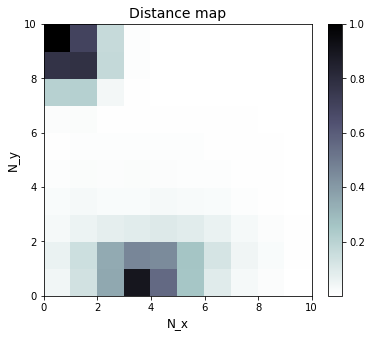

In [7]:
train_set = train_set
n_neurons = 10
m_neurons = 10
s_features = [4,5,6,8,9,13,14]
max_iter = 50000 #round(len(train_set) * 0.1)

TreeSOM.TrainSOM(train_set, base_directory, n_neurons, m_neurons, s_features, max_iter,)

Using the trained self-organising map to calculate a winning neuron (a best matching unit; the neuron with the shortest distance from a given data point)  

In [8]:
TreeSOM.GetWinningNeurons_in_Parallel(base_directory, s_features, n_neurons, m_neurons, )

Output()

In [9]:
TreeSOM.CreateGValueFluxTables(base_directory, n_neurons, m_neurons,)

  0%|          | 0/9 [00:00<?, ?it/s]

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

In [10]:
TreeSOM.GetPatternSpectra(base_directory, n_neurons, m_neurons,)

In [11]:
TreeSOM.GetNormalisedExcess(base_directory, n_neurons, m_neurons,)

  0%|          | 0/9 [00:00<?, ?it/s]

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

<Figure size 684x288 with 0 Axes>

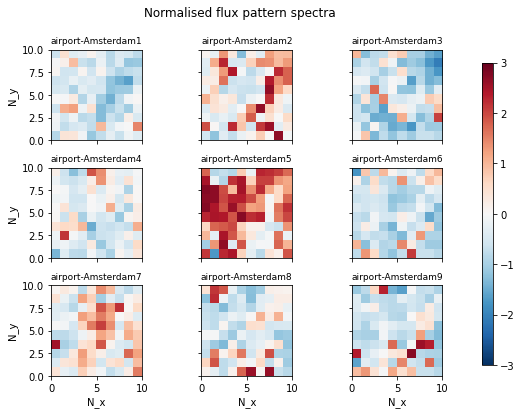

In [12]:
TreeSOM.PlotNormalisedSelfOrganisedPS(
    base_directory,
    n_neurons,
    m_neurons,
    attribute = 'flux', # flux or gval 
    tree_extension = 'csv'  
)

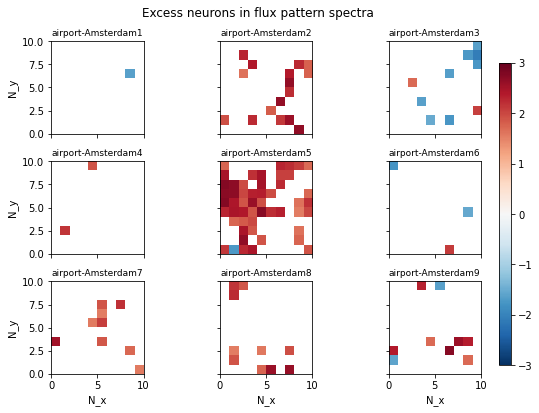

In [13]:
attribute = 'flux'
upper_limit = 1.5, # sigma
lower_limit = 1.5, # sigma

TreeSOM.PlotExcessNeurons(
    base_directory,
    n_neurons,
    m_neurons,
    upper_limit, # sigma
    lower_limit, # sigma
    attribute, # flux or gval 
    tree_extension = 'csv'  
)

In [20]:
TreeSOM.FilterAllExcessNeurons(
    base_directory,
    disccofanSOM_directory,
    n_neurons,
    m_neurons,
    upper_limit, 
    lower_limit, 
    tree_extension = 'csv',
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

Output()

Output()

Output()

Output()

Output()

15-09-2023 15:46:59 0 WARN  Floating point activated, but data is 8 bits.
HERE 


Output()

Output()

Output()

15-09-2023 15:47:00 0 WARN  Floating point activated, but data is 8 bits.
HERE 


Output()

Filtering completed!


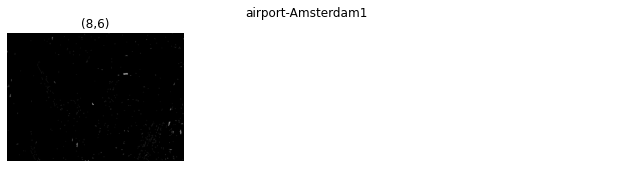

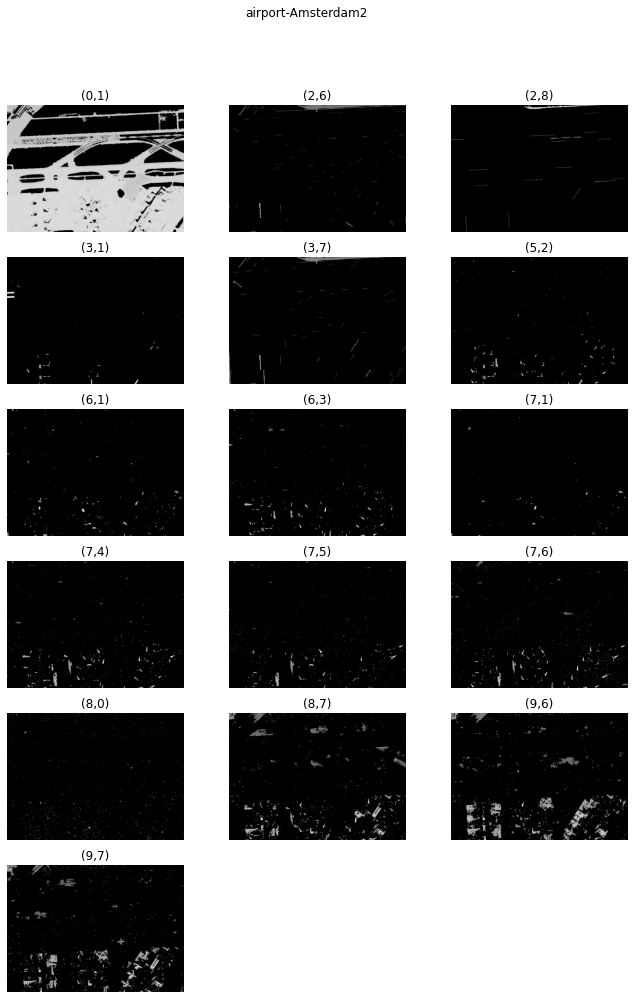

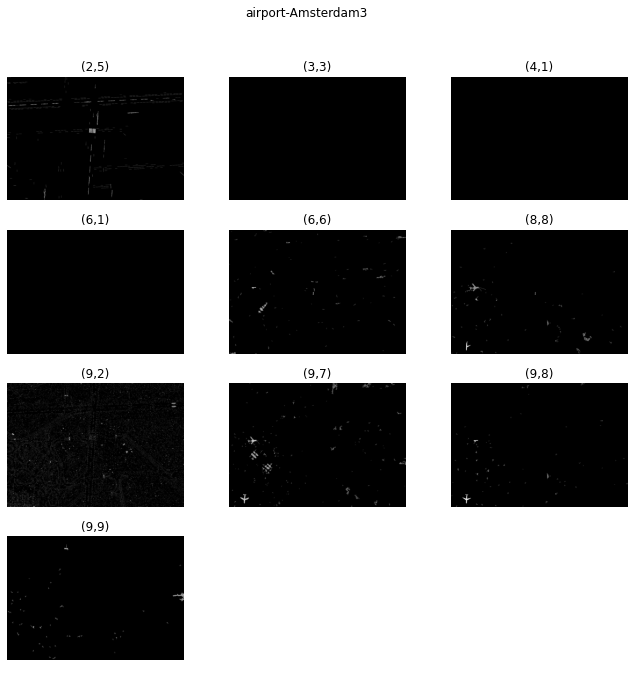

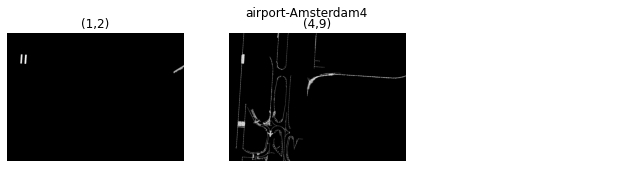

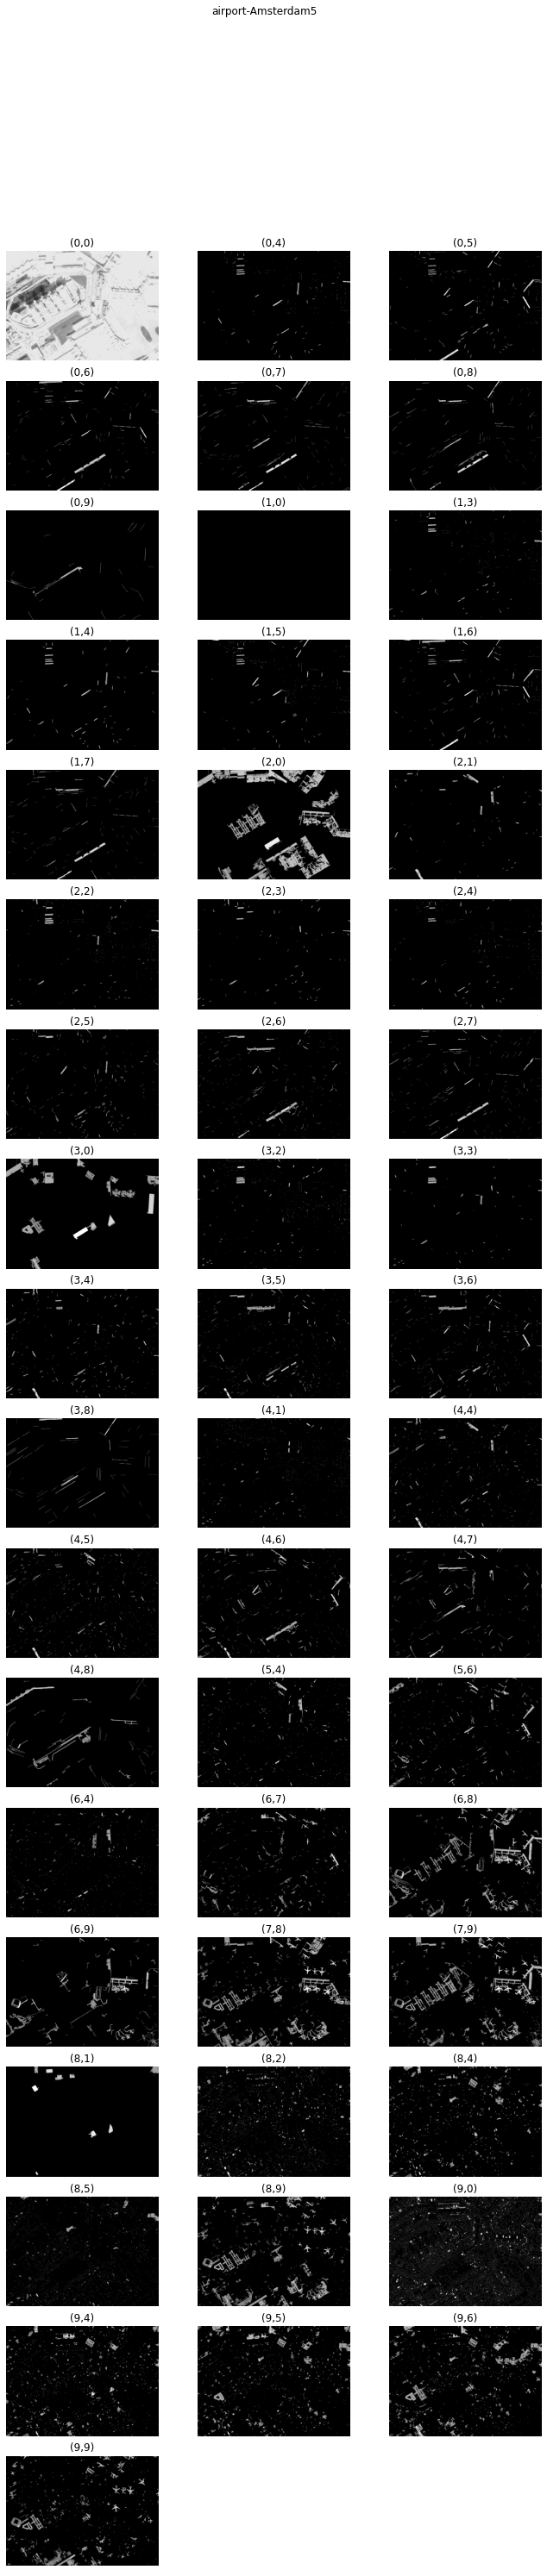

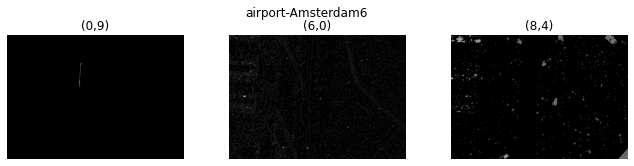

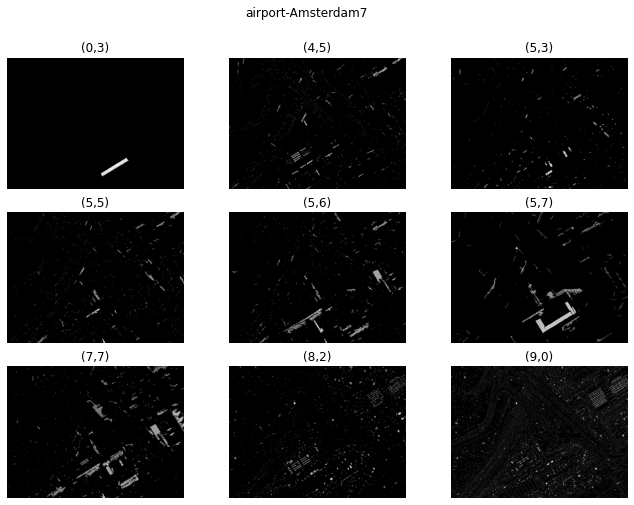

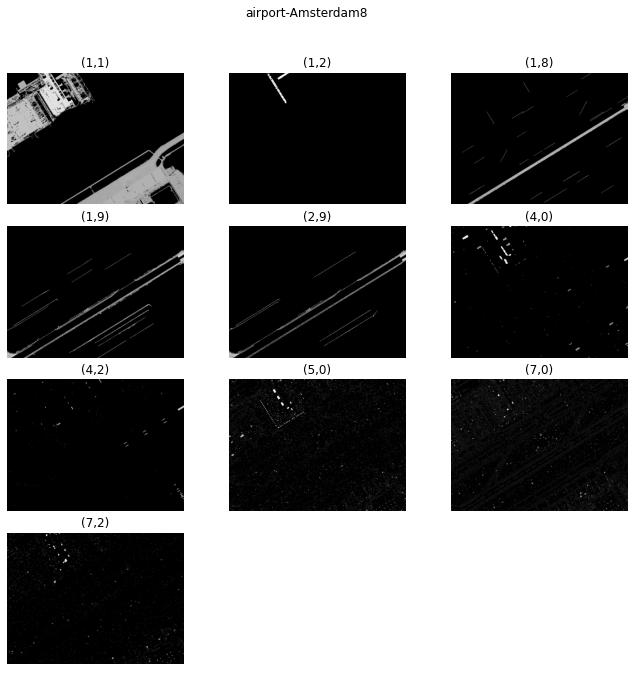

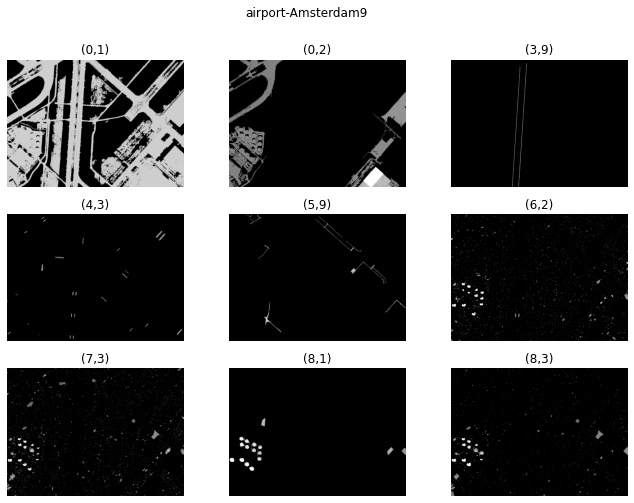

In [21]:
TreeSOM.PlotExcessNeuronsFilteredImage(
    base_directory,
    n_neurons,
    m_neurons,
    upper_limit, 
    lower_limit, 
    attribute,
    tree_extension = 'csv',
    image_extension = 'jpg'
)

Output()

rm: cannot remove '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/*.csv': No such file or directory


Filtering completed!


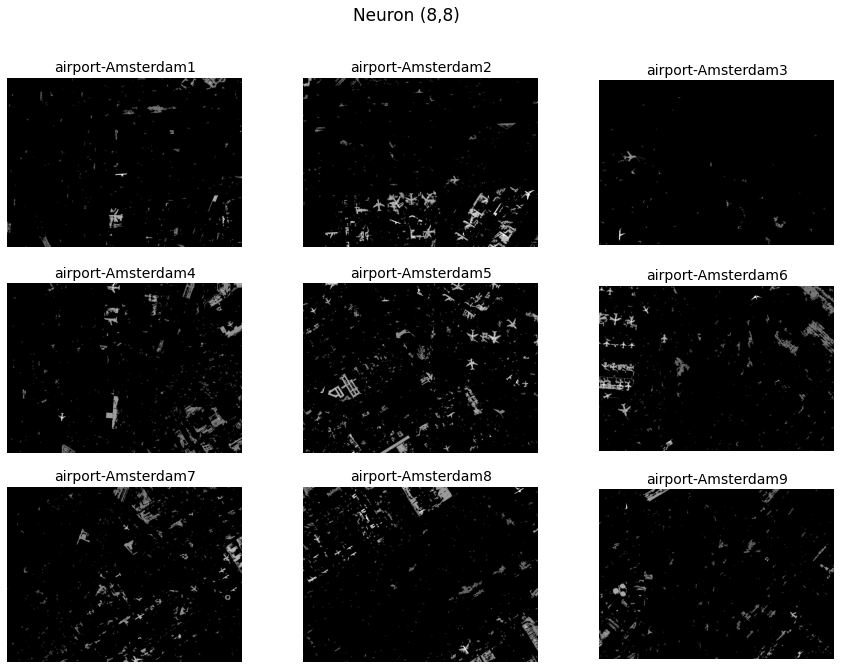

In [34]:
disccofanSOM_directory =  '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM/'

TreeSOM.CompareSingleNeuronFilteredImages(
    base_directory,
    disccofanSOM_directory,
    n_neurons,
    m_neurons,
    nx = 8,
    ny = 8,
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

Output()

rm: cannot remove '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/*.csv': No such file or directory


Filtering completed!


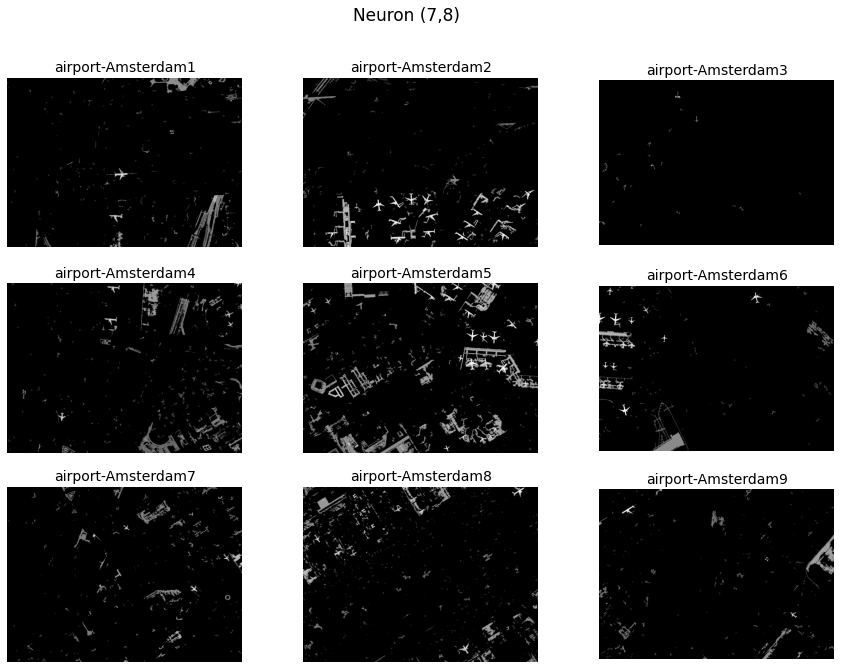

In [35]:
disccofanSOM_directory =  '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM/'

TreeSOM.CompareSingleNeuronFilteredImages(
    base_directory,
    disccofanSOM_directory,
    n_neurons,
    m_neurons,
    nx = 7,
    ny = 8,
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

Output()

15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:57:05 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
15-09-2023 15:57:07 0 WARN  Floating point activated, but data is 8 bits.
HERE 


Filtering completed!


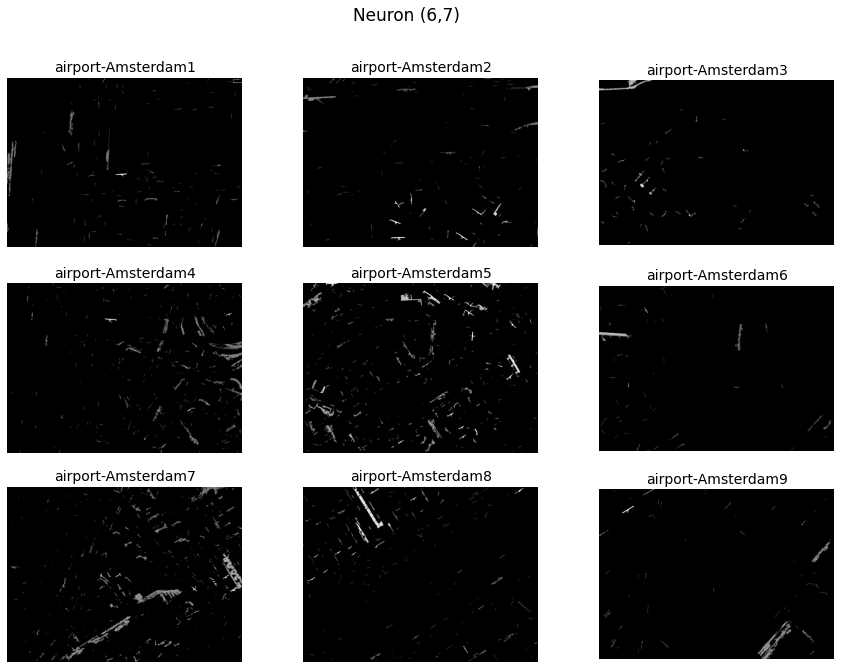

In [32]:
disccofanSOM_directory =  '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM/'

TreeSOM.CompareSingleNeuronFilteredImages(
    base_directory,
    disccofanSOM_directory,
    n_neurons,
    m_neurons,
    nx = 6,
    ny = 7,
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

Output()

15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:49:11 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 


Filtering completed!


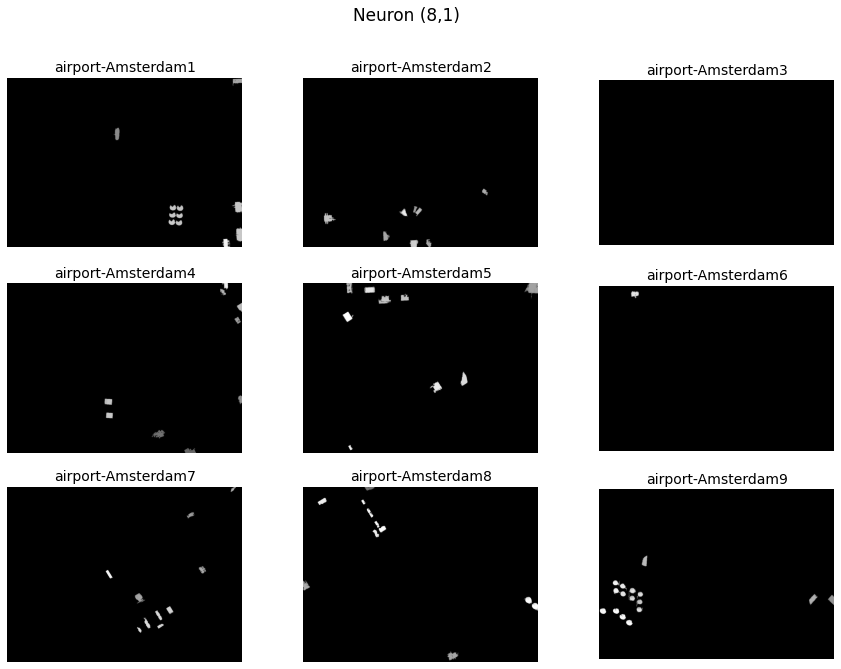

In [24]:
TreeSOM.CompareSingleNeuronFilteredImages(
    base_directory,
    disccofanSOM_directory,
    n_neurons,
    m_neurons,
    nx = 8,
    ny = 1,
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

In [25]:
TreeSOM.FilterAllNeuronsInOneImage(
    base_directory,
    disccofanSOM_directory = '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM/',
    filename = 'airport-Amsterdam2',
    n_neurons = n_neurons,
    m_neurons = m_neurons,
    n_connectivity = 8,
    n_attributes = 12,
    image_extension = 'jpg'
)

Output()

cp: cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cp: cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cp: cp: cp: cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cp: cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv'cp: cannot create regular file '/project/rpp-chime/hgan/ML-analysis/software/disccofan-SOM//SOMs/airport-Amsterdam2.csv': File exists
: File exists
: File exists: File exists

: File exists: File exists
: File exists



15-09-2023 15:50:02 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:02 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 


Output()

15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:03 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:04 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:06 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:07 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:08 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:09 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:10 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:11 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Output()

15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
15-09-2023 15:50:12 0 WARN  Floating point activated, but data is 8 bits.
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 
HERE 


Filtering completed!


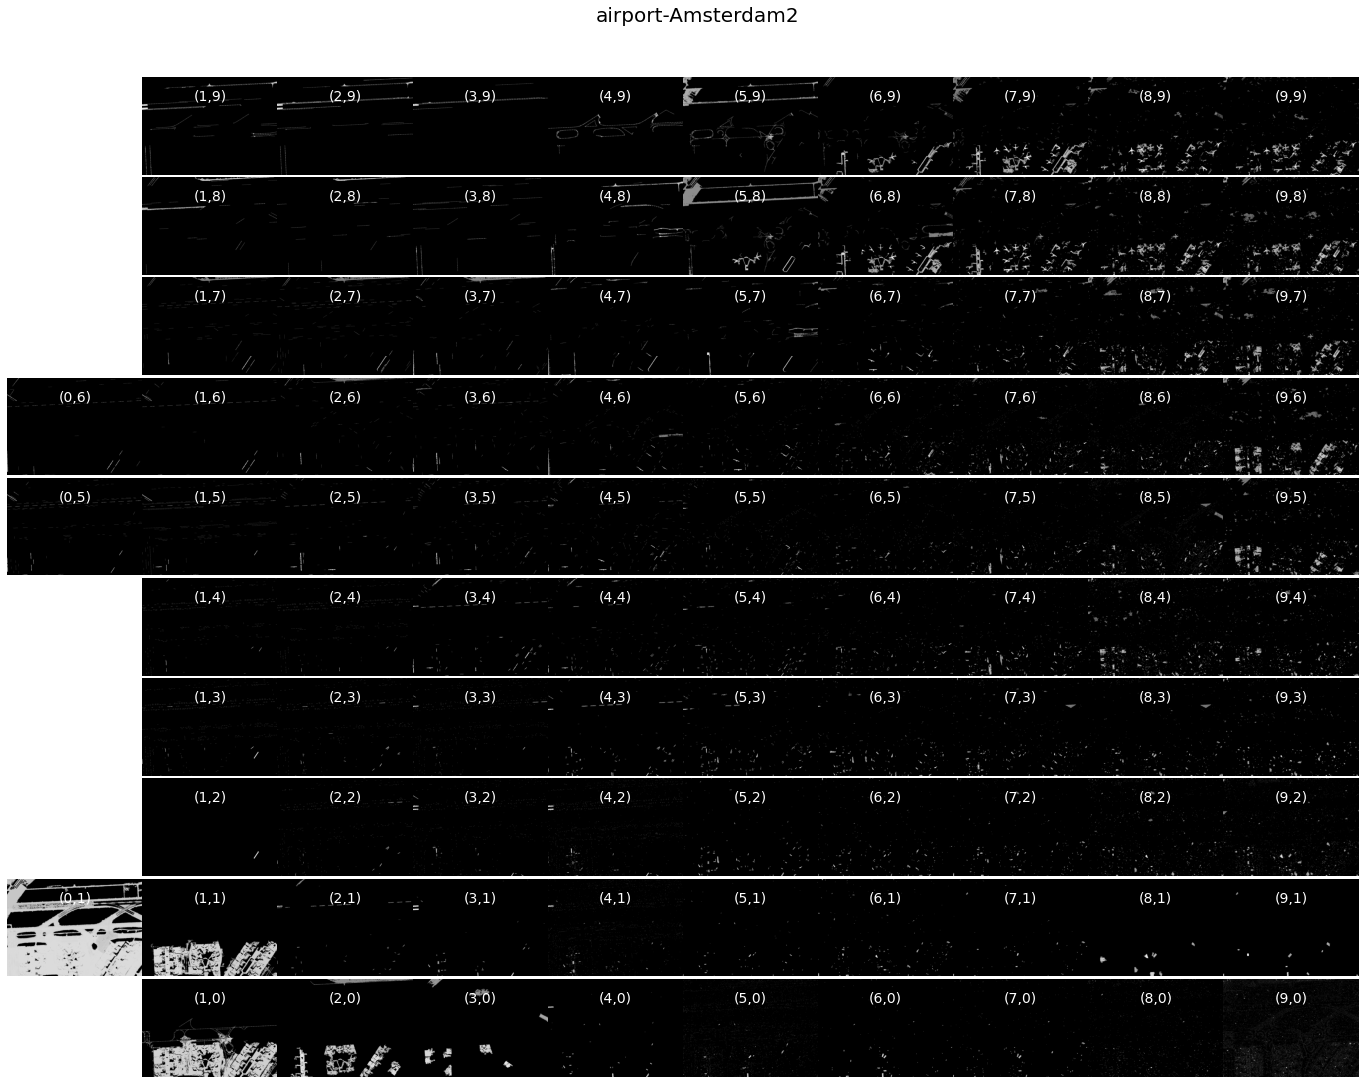

In [26]:
TreeSOM.PlotAllNeuronsInOneImage(
    base_directory,
    filename = 'airport-Amsterdam2',
    n_neurons = n_neurons,
    m_neurons = m_neurons,
    image_extension = 'jpg'
)